In [1]:
import mapping_funcs as mf
import matplotlib.pyplot as plt
from shapely import Polygon
from skimage import exposure

In [2]:
aoi = Polygon([
            [10.5513, 46.2166],
            [10.5513, 46.0717],
            [10.9410, 46.0717],
            [10.9410, 46.2166],
            [10.5513, 46.2166]
          ])

## get a digital elevation model

In [ ]:
# get digital elevation model of aoi as xarray.DataArray 
dem = mf.DEM.get_copernicus_dem(aoi, res=90)

## tanaka contours

100%|██████████| 127/127 [00:00<00:00, 155.20it/s]


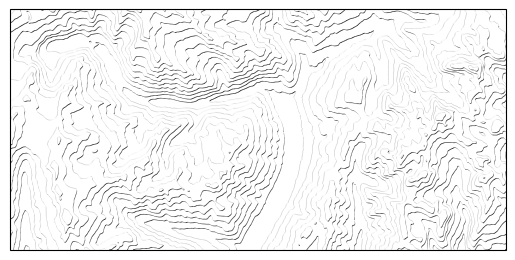

In [53]:
tanaka = mf.Tanaka(dem, k=15)

fig, ax = plt.subplots(subplot_kw={'projection':tanaka.prj})
tanaka.plot_tanaka(ax=ax)

# fig.savefig('exports/tanaka.png', dpi=300, bbox_inches='tight')

## ridge maps
inspired by...*that* joy division album cover, and the many (_many_) versions out there already ([like this fully fledged package](https://github.com/ColCarroll/ridge_map))

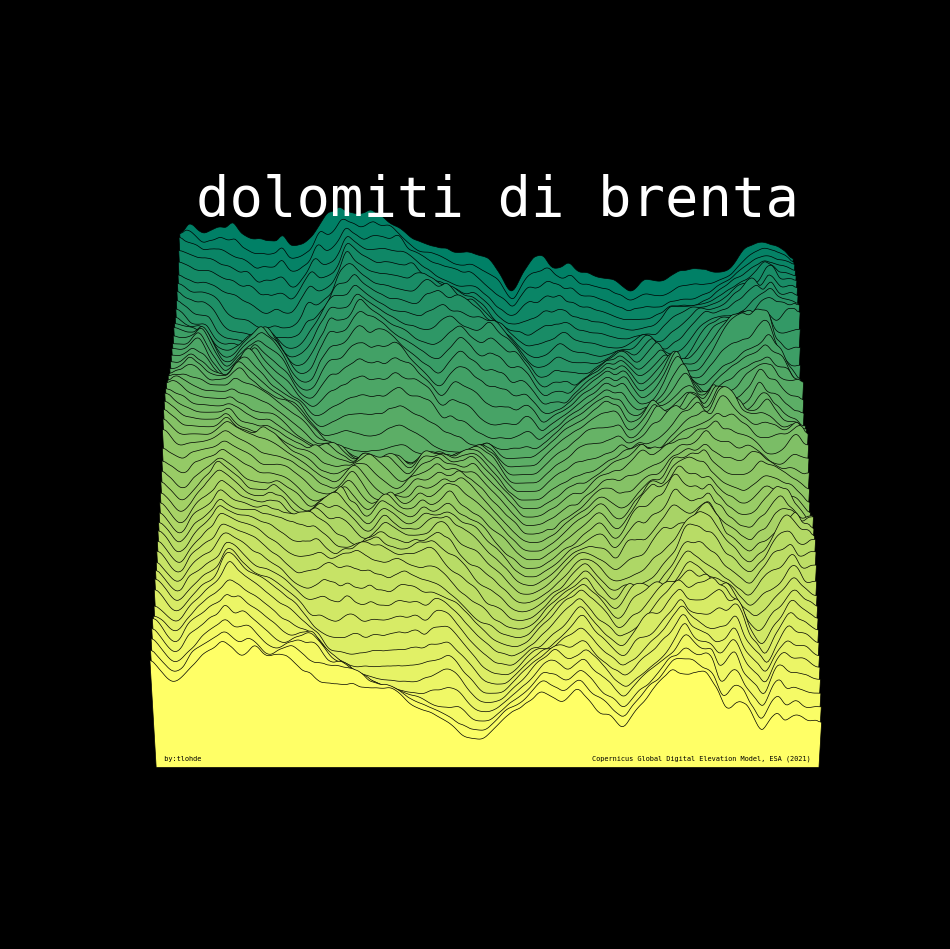

In [7]:
ridges = mf.Ridges(aoi,
                   **{'title': 'dolomiti di brenta',
                      'cmap': 'summer',
                      'fc': 'k',
                      'res': 90,
                     #  'step': 10,
                      'vert_exag': 0.25,
                      'textc': 'w',
                      'font': 'dejavu sans mono',
                      'figsize': [12,17]
                      })

# ridges.fig.savefig('exports/ridgemap.png', dpi=600, bbox_inches='tight')

## local colormaps

found 18 items in months: [7, 8]
16 contain aoi


100%|██████████| 125/125 [00:03<00:00, 34.49it/s]


found 33 items in months: [1, 2]
33 contain aoi


100%|██████████| 125/125 [00:04<00:00, 30.61it/s]


Text(0.5, 1.0, 'winter')

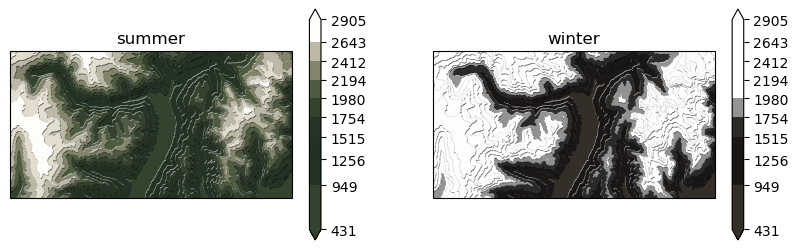

In [22]:
summer_colors = mf.LocalCmap(aoi, levels=10, months=[7,8])
winter_colors = mf.LocalCmap(aoi, levels=10, months=[1,2])

fig, axs = plt.subplots(ncols=2,
                        subplot_kw={'projection': summer_colors.SatelliteImage.prj},
                        figsize=[10,5])

# optional use of func in `get_average_per_region` to *brighten* scene
summer_colors.get_average_per_region(exposure.adjust_gamma, **{'gamma':0.8})
summer_colors.plot(ax=axs[0])
axs[0].set_title('summer')


winter_colors.plot(ax=axs[1])
axs[1].set_title('winter')

# fig.savefig('exports/local_colomaps.png', dpi=300, bbox_inches='tight')

## flow

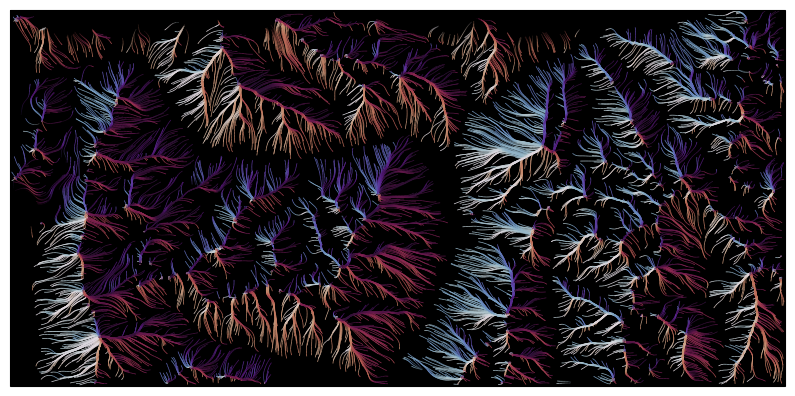

In [82]:
# using the negative of a dem makes ridges *pop*
ff = mf.Flow(-1*dem,
                    **{'reps': 75,
                       'gradient_threshold': 2})

fig, ax = plt.subplots(subplot_kw={'projection': ff.prj},
                       figsize=[10,10])

ff.plot(ax=ax, lw=0.5)
ax.set_facecolor('k')

fig.savefig('exports/flow.png', dpi=300, bbox_inches='tight')